<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.RwandaCO2Emissions/blob/data_preparation_baseline/2_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [126]:
from google.colab import drive

# Datasets
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data management
from sklearn.model_selection import train_test_split

# Other
import os

pd.set_option('display.max_columns', None)

# Setup

In [127]:
# %%capture
GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'
FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]
GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 1
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/' # e.g. GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/'
# --------------------------------------------------
try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
# ---------------------------------------
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}
url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)
# ---------------------------------------
import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model
def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)
MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)
# ---------------------------------------
from path_manager import PathManager
from model import Model
from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions
from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer
# ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

a
--2023-09-30 07:15:19--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/path_manager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3482 (3.4K) [text/plain]
Saving to: ‘path_manager.py’

path_manager.py     100%[===================>]   3.40K  --.-KB/s    in 0s      

2023-09-30 07:15:19 (24.0 MB/s) - ‘path_manager.py’ saved [3482/3482]

--2023-09-30 07:15:19--  http://path_manager.py/
Resolving path_manager.py (path_manager.py)... failed: Name or service not known.
wget: unable to resolve host address ‘path_manager.py’
FINISHED --2023-09-30 07:15:19--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.4K in 0s (24.0 MB/s)
--2023-09-30 07:15:19--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/sklearn_transformers.py
Re

# Download the data

In [128]:
df_train = pd.read_csv(manager.train_path)

In [129]:
df_submission = pd.read_csv(manager.test_path)

In [130]:
assert len(df_train.columns) == len(df_submission.columns) + 1
assert set(df_train.columns) - set(df_submission.columns) == {'emission'}

# Split the data

- We split available, labeled training data into **trainval** and **test set**

In [131]:
TRAINVAL_PERCENT = 0.85
TRAIN_PERCENT = 0.8
RANDOM_STATE = 42
TARGET_COLUMN = 'emission'

df_trainval, df_test = train_test_split(
    df_train,
    train_size=TRAINVAL_PERCENT,
    random_state=RANDOM_STATE
)

df_train, df_val = train_test_split(
    df_trainval,
    train_size=TRAIN_PERCENT,
    random_state=RANDOM_STATE
)

df_train.shape, df_val.shape, df_test.shape

((53735, 76), (13434, 76), (11854, 76))

## Make sure train, validation and test are from the same distribution

# Pre-process the data

## Cleaning NAN columns

In [132]:
NAN_THRESHOLD = 18

res = nan_statistics(df_train)
nan_cols = [col for col in res.keys() if res[col] >= NAN_THRESHOLD]
nan_cols

Col -- Nan percentage
UvAerosolLayerHeight_aerosol_height 99.43612170838374
UvAerosolLayerHeight_aerosol_pressure 99.43612170838374
UvAerosolLayerHeight_aerosol_optical_depth 99.43612170838374
UvAerosolLayerHeight_sensor_zenith_angle 99.43612170838374
UvAerosolLayerHeight_sensor_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_zenith_angle 99.43612170838374
NitrogenDioxide_NO2_column_number_density 23.23997394621755
NitrogenDioxide_tropospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_stratospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_NO2_slant_column_number_density 23.23997394621755
NitrogenDioxide_tropopause_pressure 23.23997394621755
NitrogenDioxide_absorbing_aerosol_index 23.23997394621755
NitrogenDioxide_cloud_fraction 23.23997394621755
NitrogenDioxide_sensor_altitude 23.23997394621755
NitrogenDioxide_sensor_azimuth_angle 23.23997394621755
NitrogenDioxide_sensor_zenith_an

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle',
 'UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 

In [133]:
def remove_cols(df, cols):
    return df.drop(columns=cols)

df_train = remove_cols(df_train, nan_cols)
df_val = remove_cols(df_val, nan_cols)
df_test = remove_cols(df_test, nan_cols)
df_submission = remove_cols(df_submission, nan_cols)

In [134]:
assert \
    set(df_train.columns) - set(df_submission) == {TARGET_COLUMN} and \
    set(df_train) == set(df_val) == set(df_test)

## Clean outliers in target feature (row-wise)

In [135]:
df_train['emission'].describe()

count    53735.000000
mean        81.751192
std        144.095447
min          0.000000
25%          9.688742
50%         45.482280
75%        109.397098
max       3167.768000
Name: emission, dtype: float64

0.057709128128780124
count    50634.000000
mean        60.645843
std         61.284971
min          0.000000
25%          7.936085
50%         40.785533
75%         97.942678
max        249.980670
Name: emission, dtype: float64


Text(0.5, 1.0, 'After outlier cleaning')

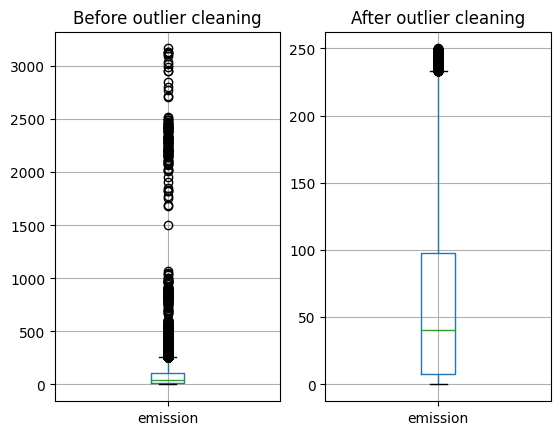

In [136]:
TARGET_OUTLIER_THRESHOLD = 250

print(
    df_train.loc[df_train[TARGET_COLUMN] >= TARGET_OUTLIER_THRESHOLD].shape[0] /
    df_train.shape[0]
)

print(
    df_train.loc[
        df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD
    ][TARGET_COLUMN].describe()
)

_, ax = plt.subplots(1, 2)
df_train[[TARGET_COLUMN]].boxplot(ax=ax[0])
df_train.loc[
    df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD,
    :
][[TARGET_COLUMN]].boxplot(ax=ax[1])

ax[0].set_title('Before outlier cleaning')
ax[1].set_title(f'After outlier cleaning')

In [137]:
def clean_outlier(df, val):
    print(f'Shape before: {df.shape}')
    df = df.loc[
        df[TARGET_COLUMN] <= val,
        :
    ]
    print(f'Shape after: {df.shape}')
    return df

df_train = clean_outlier(df_train, TARGET_OUTLIER_THRESHOLD)
df_val = clean_outlier(df_val, TARGET_OUTLIER_THRESHOLD)
df_test = clean_outlier(df_test, TARGET_OUTLIER_THRESHOLD)

# df_submission does not have TARGET_COLUMN

Shape before: (53735, 48)
Shape after: (50634, 48)
Shape before: (13434, 48)
Shape after: (12611, 48)
Shape before: (11854, 48)
Shape after: (11160, 48)


## Removing categorical columns

In [138]:
train_cat_col = df_train.dtypes.loc[df_train.dtypes == 'object']
val_cat_col = df_val.dtypes.loc[df_train.dtypes == 'object']
test_cat_col = df_test.dtypes.loc[df_test.dtypes == 'object']
submission_cat_col = df_submission.dtypes.loc[df_submission.dtypes == 'object']

assert (train_cat_col == val_cat_col).all() and (val_cat_col == test_cat_col).all() and \
    (train_cat_col == submission_cat_col).all() and train_cat_col.shape[0] == 1  # only 1 cat col
print(train_cat_col)

ID_LAT_LON_YEAR_WEEK    object
dtype: object


In [139]:
COL_TO_DROP = 'ID_LAT_LON_YEAR_WEEK'


params=dict(labels=[COL_TO_DROP], axis='columns', inplace=True, errors='ignore')
df_train.drop(**params)
df_val.drop(**params)
df_test.drop(**params)
df_submission.drop(**params)

for df in [df_train, df_val, df_test, df_submission]:
    assert not COL_TO_DROP in df.columns

<ipython-input-139-4cdacc830761>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(**params)
<ipython-input-139-4cdacc830761>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(**params)
<ipython-input-139-4cdacc830761>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(**params)


## Feature engineering

### Season feature

In [140]:
print(sorted(df_train.week_no.unique())), len(df_train.week_no.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


(None, 53)

In [141]:
SEASON_COLUMN = 'season'

WEEK_TO_SEASON_DICT = {
    'winter': [0, 12],
    'spring': [13, 26],
    'summer': [27, 40],
    'autumn': [41, 53]
}

def calculate_season(item):
    for key, value in WEEK_TO_SEASON_DICT.items():
        if value[0] <= item <= value[1]:
            return key
    raise Exception  # unexpected key

def add_season_feature(df):
    df[SEASON_COLUMN] = df['week_no'].map(
        lambda item: calculate_season(item),
        # axis='rows'
    )
    return df

df_train = add_season_feature(df_train)
df_val = add_season_feature(df_val)
df_test = add_season_feature(df_test)
df_submission = add_season_feature(df_submission)


for df in [df_train, df_val, df_test, df_submission]:
    assert SEASON_COLUMN in df.columns

<ipython-input-141-a77514f61a7f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[SEASON_COLUMN] = df['week_no'].map(
<ipython-input-141-a77514f61a7f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[SEASON_COLUMN] = df['week_no'].map(
<ipython-input-141-a77514f61a7f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [142]:
df_train.loc[:5, ['season', 'week_no']]

,season,week_no
40910,autumn,47
30837,autumn,44
4495,autumn,43
58009,summer,27
70372,autumn,41
...,...,...
16528,autumn,45
40313,summer,33
7283,spring,22
30246,summer,36


### Binning for latitude and longitude

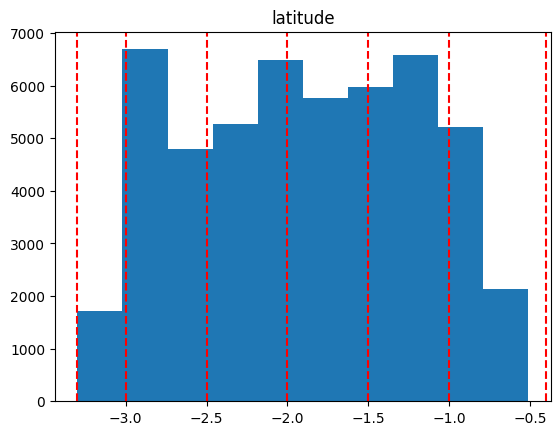

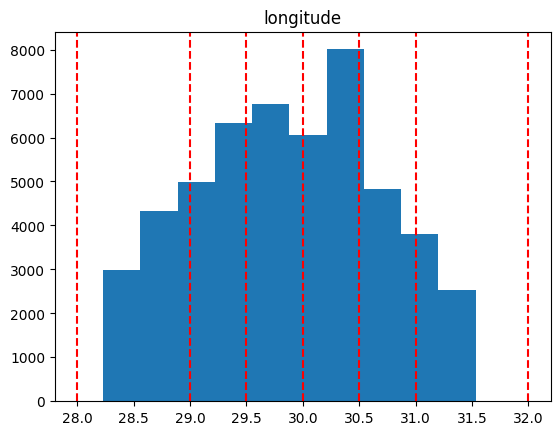

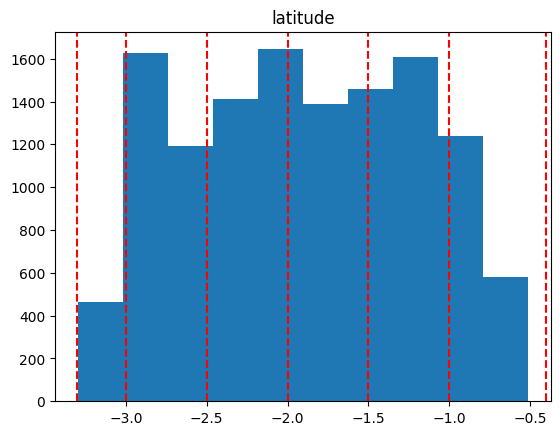

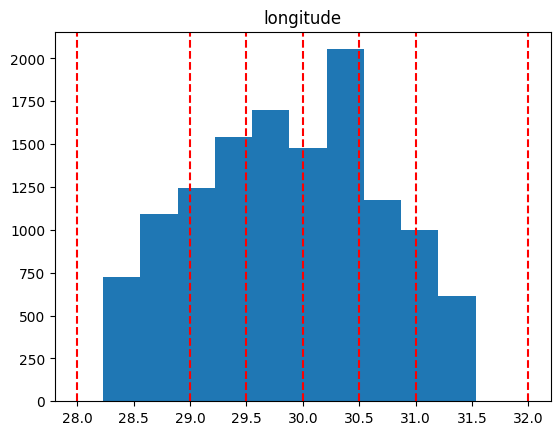

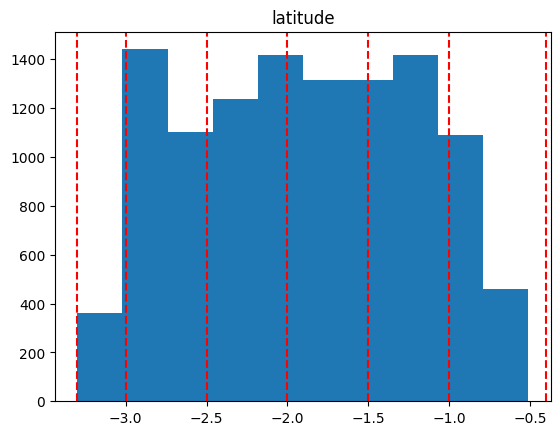

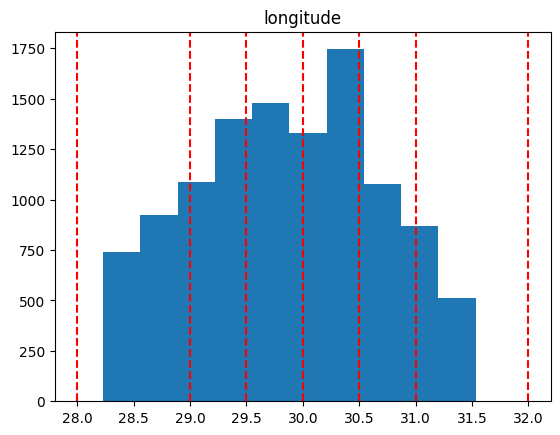

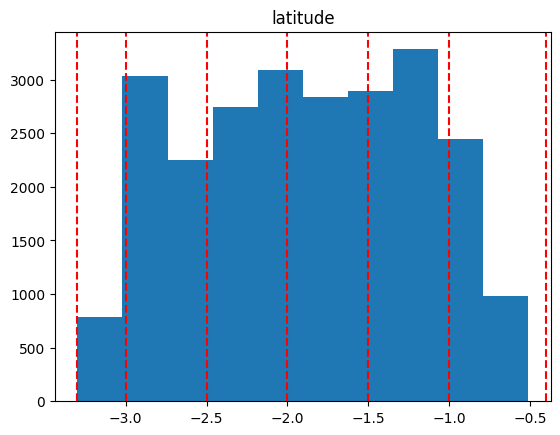

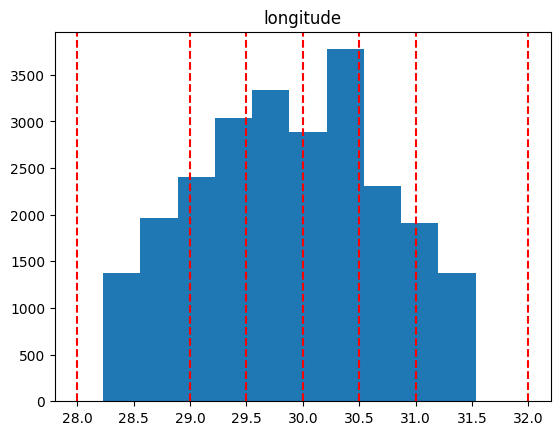

In [143]:
from sklearn_utils import bin_column


for df in [df_train, df_val, df_test, df_submission]:
    assert df['latitude'].isna().sum() == 0 and \
        df['longitude'].isna().sum() == 0

LATITUDE_BINS = [-3.3, -3.0, -2.5, -2.0, -1.5, -1.0, -0.4]
LONGITUDE_BINS =  [28, 29.0, 29.5, 30, 30.5, 31, 32]


for df in [df_train, df_val, df_test, df_submission]:
    bin_column(df, 'latitude', LATITUDE_BINS)
    bin_column(df, 'longitude', LONGITUDE_BINS)


for df in [df_train, df_val, df_test, df_submission]:
    assert df['latitude'].isna().sum() == 0 and \
        df['longitude'].isna().sum() == 0 and \
        df['latitude_binned'].isna().sum() == 0 and \
        df['longitude_binned'].isna().sum() == 0

### Feature cross for latitude and longitude

In [144]:
for df in [df_train, df_val, df_test, df_submission]:
    df['coordinate_zone'] = df.apply(
        lambda item: f'{item["latitude_binned"]}x{item["longitude_binned"]}',
        axis=1
    )

assert set(df_train['coordinate_zone'].unique()) == set(df_val['coordinate_zone'].unique()) and \
    set(df_train['coordinate_zone'].unique()) == set(df_test['coordinate_zone'].unique()) and \
    set(df_train['coordinate_zone'].unique()) == set(df_submission['coordinate_zone'].unique())

In [145]:
df_train.iloc[:5, :].loc[:, ['latitude_binned', 'longitude_binned', 'coordinate_zone']]

,latitude_binned,longitude_binned,coordinate_zone
40910,3,2,3x2
30837,3,3,3x3
4495,5,4,5x4
58009,2,0,2x0
70372,1,3,1x3


In [146]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df_train[['coordinate_zone']])
encoder.categories_[0]

array(['0x0', '0x1', '0x2', '0x3', '0x4', '1x0', '1x1', '1x2', '1x3',
       '1x4', '2x0', '2x1', '2x2', '2x3', '2x4', '2x5', '3x0', '3x1',
       '3x2', '3x3', '3x4', '3x5', '4x0', '4x1', '4x2', '4x3', '4x4',
       '4x5', '5x0', '5x1', '5x2', '5x3', '5x4', '5x5'], dtype=object)

In [147]:
def do_feature_cross(df, one_hot_encoder, column):
    transformation = one_hot_encoder.transform(df[[column]])
    temp_df = pd.DataFrame(transformation.toarray())
    print(f'SHAPES: {df.shape}, {temp_df.shape}')
      # transformed_df = pd.DataFrame(encoder.fit_transform(df[[column_name]]).toarray())
    print(f'After transformation {temp_df.isna().sum().sum()} nans')

    print(f'Before join: {df.isna().sum().sum()} nans')
    temp_df.columns = [
        f'zone_{n}' for n in temp_df.columns
    ]
    temp_df.index = df.index
    # assert temp_df.index == df.index
    df = df.join(temp_df)
    print(f'After join: {df.isna().sum().sum()} nans\n')
    return df

df_train = do_feature_cross(df_train, encoder, 'coordinate_zone')
df_val = do_feature_cross(df_val, encoder, 'coordinate_zone')
df_test = do_feature_cross(df_test, encoder, 'coordinate_zone')
df_submission = do_feature_cross(df_submission, encoder, 'coordinate_zone')

SHAPES: (50634, 51), (50634, 34)
After transformation 0 nans
Before join: 57682 nans
After join: 57682 nans

SHAPES: (12611, 51), (12611, 34)
After transformation 0 nans
Before join: 14061 nans
After join: 14061 nans

SHAPES: (11160, 51), (11160, 34)
After transformation 0 nans
Before join: 12153 nans
After join: 12153 nans

SHAPES: (24353, 50), (24353, 34)
After transformation 0 nans
Before join: 41871 nans
After join: 41871 nans



In [148]:
df_train.head()

,latitude,longitude,year,week_no,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,season,latitude_binned,longitude_binned,coordinate_zone,zone_0,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,zone_9,zone_10,zone_11,zone_12,zone_13,zone_14,zone_15,zone_16,zone_17,zone_18,zone_19,zone_20,zone_21,zone_22,zone_23,zone_24,zone_25,zone_26,zone_27,zone_28,zone_29,zone_30,zone_31,zone_32,zone_33
40910,-1.920,29.680,2019,47,0.028599,1825.805442,1292.967083,830056.750000,-54.737664,1.486451,-128.736892,31.786182,0.000108,1.312913,0.000085,0.000000,31.820597,-128.760705,1.273181,-103.191816,-1.334247,830055.960056,-42.165114,39.827914,-129.193402,33.130001,0.110145,2.701318,0.302153,224.490121,0.695068,-50.161239,42.438279,-128.002297,34.036405,0.817658,37737.148032,8162.673192,43132.752371,7162.673192,37.961085,0.293885,-41.323744,49.299182,-127.870770,34.403923,118.480820,autumn,3,2,3x2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30837,-1.615,30.285,2021,44,0.031915,1808.873494,3510.297272,830008.051681,4.591304,37.296160,-119.707901,29.864087,0.000084,1.191212,0.000038,0.129220,27.841317,-122.344325,29.769370,15.725189,-1.303334,830020.642857,-0.353030,41.385395,-119.915119,29.575664,0.118456,2.614275,0.314135,231.043743,0.480037,-0.353030,41.385395,-119.915120,29.575664,0.675891,56408.439522,5130.416212,63293.120905,4177.367227,41.580721,0.353132,4.710682,50.069595,-120.014383,29.542543,116.396220,autumn,3,3,3x3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4495,-0.853,30.647,2019,43,0.025971,1974.702454,2938.738037,829758.312500,-12.644104,48.455471,-118.580257,30.087629,0.000028,1.652282,-0.000025,0.296752,30.695150,-117.464831,39.694235,-42.087875,-1.400524,829743.374322,-0.436445,45.609275,-119.702434,28.991090,0.116183,2.736499,0.322173,227.137081,0.726315,-0.436445,45.609275,-119.702434,28.991090,0.732139,46236.271742,6804.948343,52567.215736,5804.948483,43.425071,0.292878,-0.435480,45.617863,-119.697475,28.991118,63.855354,autumn,5,4,5x4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58009,-2.427,28.673,2021,27,0.039155,1673.456036,2491.537389,830109.782025,29.319749,28.692096,-35.620812,31.573641,0.000079,0.877163,0.000015,0.265362,31.586331,-35.564168,28.733751,31.052961,-1.184844,830217.384463,-12.729215,30.128392,-38.389226,33.109216,0.118530,2.440768,0.293866,230.504964,0.609769,-12.729215,30.128392,-38.389226,33.109216,0.808946,58340.132505,4496.133288,66255.898666,3496.133116

In [149]:
df_train.loc[
    df_train['coordinate_zone'] == '1x0',
    ['coordinate_zone', *[f'zone_{i}' for i in np.arange(34)]]
]

,coordinate_zone,zone_0,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,zone_9,zone_10,zone_11,zone_12,zone_13,zone_14,zone_15,zone_16,zone_17,zone_18,zone_19,zone_20,zone_21,zone_22,zone_23,zone_24,zone_25,zone_26,zone_27,zone_28,zone_29,zone_30,zone_31,zone_32,zone_33
68278,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71197,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71195,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60895,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71846,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62721,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70598,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72321,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71782,1x0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
[
    print(df.shape)
    for df in [
        df_train,
        df_val,
        df_test,
        df_submission
    ]
]

(50634, 85)
(12611, 85)
(11160, 85)
(24353, 84)


[None, None, None, None]

# Data processing pipeline

## Transform the datasets

In [151]:
train_set = set(df_train.columns)
val_set = set(df_val.columns)
test_set = set(df_test.columns)
submission_set = set(df_submission.columns)

assert \
    train_set - submission_set == {'emission'} and \
    train_set == val_set and \
    val_set == test_set

In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_cols = [
    'latitude',
    'longitude',
    'CarbonMonoxide_CO_column_number_density',
    'CarbonMonoxide_H2O_column_number_density',
    'CarbonMonoxide_cloud_height',
    'CarbonMonoxide_sensor_altitude',
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle',
    'CarbonMonoxide_solar_azimuth_angle',
    'CarbonMonoxide_solar_zenith_angle',
    'Formaldehyde_tropospheric_HCHO_column_number_density',
    'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_cloud_fraction',
    'Formaldehyde_solar_zenith_angle',
    'Formaldehyde_solar_azimuth_angle',
    'Formaldehyde_sensor_zenith_angle',
    'Formaldehyde_sensor_azimuth_angle',
    'UvAerosolIndex_absorbing_aerosol_index',
    'UvAerosolIndex_sensor_altitude',
    'UvAerosolIndex_sensor_azimuth_angle',
    'UvAerosolIndex_sensor_zenith_angle',
    'UvAerosolIndex_solar_azimuth_angle',
    'UvAerosolIndex_solar_zenith_angle',
    'Ozone_O3_column_number_density',
    'Ozone_O3_column_number_density_amf',
    'Ozone_O3_slant_column_number_density',
    'Ozone_O3_effective_temperature',
    'Ozone_cloud_fraction',
    'Ozone_sensor_azimuth_angle',
    'Ozone_sensor_zenith_angle',
    'Ozone_solar_azimuth_angle',
    'Ozone_solar_zenith_angle',
    'Cloud_cloud_fraction',
    'Cloud_cloud_top_pressure',
    'Cloud_cloud_top_height',
    'Cloud_cloud_base_pressure',
    'Cloud_cloud_base_height',
    'Cloud_cloud_optical_depth',
    'Cloud_surface_albedo',
    'Cloud_sensor_azimuth_angle',
    'Cloud_sensor_zenith_angle',
    'Cloud_solar_azimuth_angle',
    'Cloud_solar_zenith_angle'
]

categorical_cols = [
    # 'year',
    'season',
]
zone_cols = [
    'zone_0',
    'zone_1',
    'zone_2',
    'zone_3',
    'zone_4',
    'zone_5',
    'zone_6',
    'zone_7',
    'zone_8',
    'zone_9',
    'zone_10',
    'zone_11',
    'zone_12',
    'zone_13',
    'zone_14',
    'zone_15',
    'zone_16', 'zone_17', 'zone_18', 'zone_19', 'zone_20', 'zone_21',
    'zone_22', 'zone_23', 'zone_24', 'zone_25', 'zone_26', 'zone_27',
    'zone_28', 'zone_29', 'zone_30', 'zone_31', 'zone_32', 'zone_33'
]

week_column = ['week_no']

columns_to_remove = [
    'coordinate_zone',
    'latitude',
    'longitude',
    'latitude_binned',
    'longitude_binned'
]

target_column = ['emission']

In [153]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)

zone_pipeline = make_pipeline(
    # Do nothing, it is already 0 or 1
    SimpleImputer(strategy='constant', fill_value=0),
    MinMaxScaler()
)


assert \
    df_train['week_no'].isna().sum() == 0 and \
    df_val['week_no'].isna().sum() == 0 and \
    df_test['week_no'].isna().sum() == 0 and \
    df_submission['week_no'].isna().sum() == 0

week_no_pipeline = make_pipeline(
    MinMaxScaler()
)

In [154]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_pipeline, num_cols),
        ('cat_cols', categorical_pipeline, categorical_cols),
        ('zone_cols', zone_pipeline, zone_cols),
        ('week_no', week_no_pipeline, week_column),
    ],
    remainder='drop'
)

In [155]:
def preprocess_data(df, target_column, preprocessor, fit=False, detach_targets=True):
    if detach_targets:
        targets = df[target_column]
        print(f'Nans: {targets.isna().sum()}')

    if fit:
        preprocessor.fit(df)


    result = pd.DataFrame(preprocessor.transform(df))
    if detach_targets:
        print(result.shape, targets.shape)
        targets.index = result.index
        result['target'] = targets
        print(f'Nans after joining targets: {result["target"].isna().sum()}\n')
    return result

df_train_processed = preprocess_data(df_train, 'emission', preprocessor, fit=True)
df_val_processed = preprocess_data(df_val, 'emission', preprocessor, fit=False)
df_test_processed = preprocess_data(df_test, 'emission', preprocessor, fit=False)
df_submission_processed = preprocess_data(df_submission, '', preprocessor, fit=False, detach_targets=False)

Nans: 0
(50634, 83) (50634,)
Nans after joining targets: 0

Nans: 0
(12611, 83) (12611,)
Nans after joining targets: 0

Nans: 0
(11160, 83) (11160,)
Nans after joining targets: 0



## Post processing test

<class 'pandas.core.frame.DataFrame'> Shape: (50634, 84)
Max feature val: 12.059110901994984, Min: -7.414072079200086
Nans: 0
<class 'pandas.core.frame.DataFrame'> Shape: (12611, 84)
Max feature val: 17.094219022148707, Min: -8.52114083678574
Nans: 0
<class 'pandas.core.frame.DataFrame'> Shape: (24353, 83)
Max feature val: 18.85630059380134, Min: -7.3132656487813845
Nans: 0


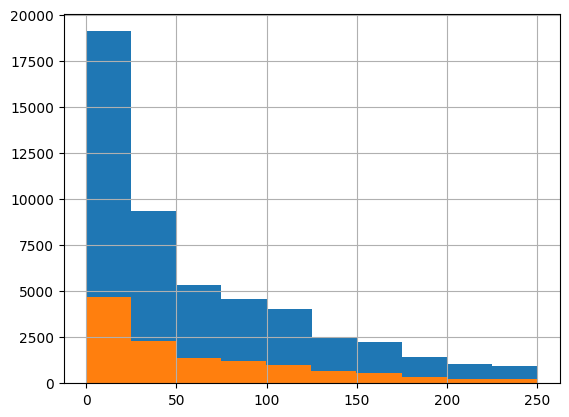

In [156]:
def post_preprocessing_test(df):
    print(type(df), 'Shape:', df.shape)
    print(f'Max feature val: {np.max(df.iloc[:, :-1].values)}, Min: {np.min(df.iloc[:, :-1].values)}')

    if 'target' in df.columns:
        df['target'].hist()
    print(f'Nans: {df.isna().sum().sum()}')

post_preprocessing_test(df_train_processed)
post_preprocessing_test(df_val_processed)
post_preprocessing_test(df_submission_processed)

# Save the data

In [157]:
manager.save_to_csv(
    df_train_processed,
    manager.data_trial_path,
    'train_processed.csv'
)

In [158]:
manager.save_to_csv(
    df_val_processed,
    manager.data_trial_path,
    'val_processed.csv'
)

In [159]:
manager.save_to_csv(
    df_test_processed,
    manager.data_trial_path,
    'test_processed.csv'
)

In [160]:
manager.save_to_csv(
    df_submission_processed,
    manager.data_trial_path,
    'submission_processed.csv'
)